📦 1. Import Libraries

In [144]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from imblearn.over_sampling import RandomOverSampler
import joblib

📁 2. Load and Inspect Data

In [145]:
# Load data
df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
pd.set_option('display.max_columns', None)

# Display first 20 rows
print("First 20 Rows:")
print(df.head(20))

# Basic info about the data
print("\nData Info:")
print(df.info())

# Statistical summary for categorical features



First 20 Rows:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0   7590-VHVEG  Female              0     Yes         No       1           No   
1   5575-GNVDE    Male              0      No         No      34          Yes   
2   3668-QPYBK    Male              0      No         No       2          Yes   
3   7795-CFOCW    Male              0      No         No      45           No   
4   9237-HQITU  Female              0      No         No       2          Yes   
5   9305-CDSKC  Female              0      No         No       8          Yes   
6   1452-KIOVK    Male              0      No        Yes      22          Yes   
7   6713-OKOMC  Female              0      No         No      10           No   
8   7892-POOKP  Female              0     Yes         No      28          Yes   
9   6388-TABGU    Male              0      No        Yes      62          Yes   
10  9763-GRSKD    Male              0     Yes        Yes      13          Yes   
11  7469-LKBC

In [146]:
print("\nCategorical Columns Summary:")
print(df.describe(include='O'))

# Check problematic rows
print("\nCheck rows with empty 'TotalCharges':")
print(df[df['TotalCharges'] == ' '].shape)


Categorical Columns Summary:
        customerID gender Partner Dependents PhoneService MultipleLines  \
count         7043   7043    7043       7043         7043          7043   
unique        7043      2       2          2            2             3   
top     7590-VHVEG   Male      No         No          Yes            No   
freq             1   3555    3641       4933         6361          3390   

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies        Contract  \
count         7043        7043            7043            7043   
unique           3           3               3               3   
top             No          No          

🔍 3. Data Cleaning: Fix TotalCharges Column


Data types after cleaning:
MonthlyCharges    float64
TotalCharges      float64
dtype: object


C:\Users\d\AppData\Local\Temp\ipykernel_24008\185060240.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


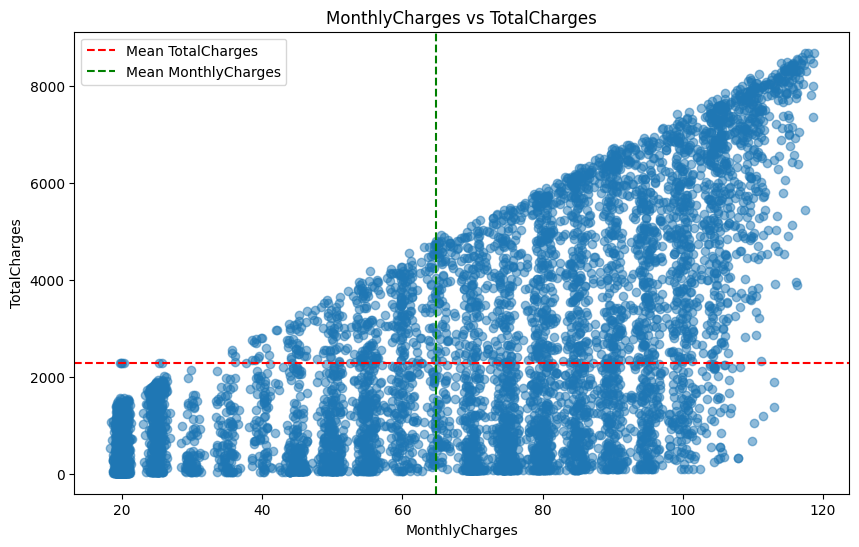

In [147]:

# Replace spaces with NaN and convert to numeric
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing values with mean
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)

# Check dtypes after cleaning
print("\nData types after cleaning:")
print(df[['MonthlyCharges', 'TotalCharges']].dtypes)

# Optional: Visualize relationship between Monthly & Total Charges
plt.figure(figsize=(10, 6))
plt.scatter(df['MonthlyCharges'], df['TotalCharges'], alpha=0.5)
plt.axhline(y=df['TotalCharges'].mean(), color='r', linestyle='--', label='Mean TotalCharges')
plt.axvline(x=df['MonthlyCharges'].mean(), color='g', linestyle='--', label='Mean MonthlyCharges')
plt.legend()
plt.xlabel('MonthlyCharges')
plt.ylabel('TotalCharges')
plt.title('MonthlyCharges vs TotalCharges')
plt.show()



🧹 4. Check Missing Values Again

In [148]:
# Check missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


📊 5. Exploratory Data Analysis (EDA)

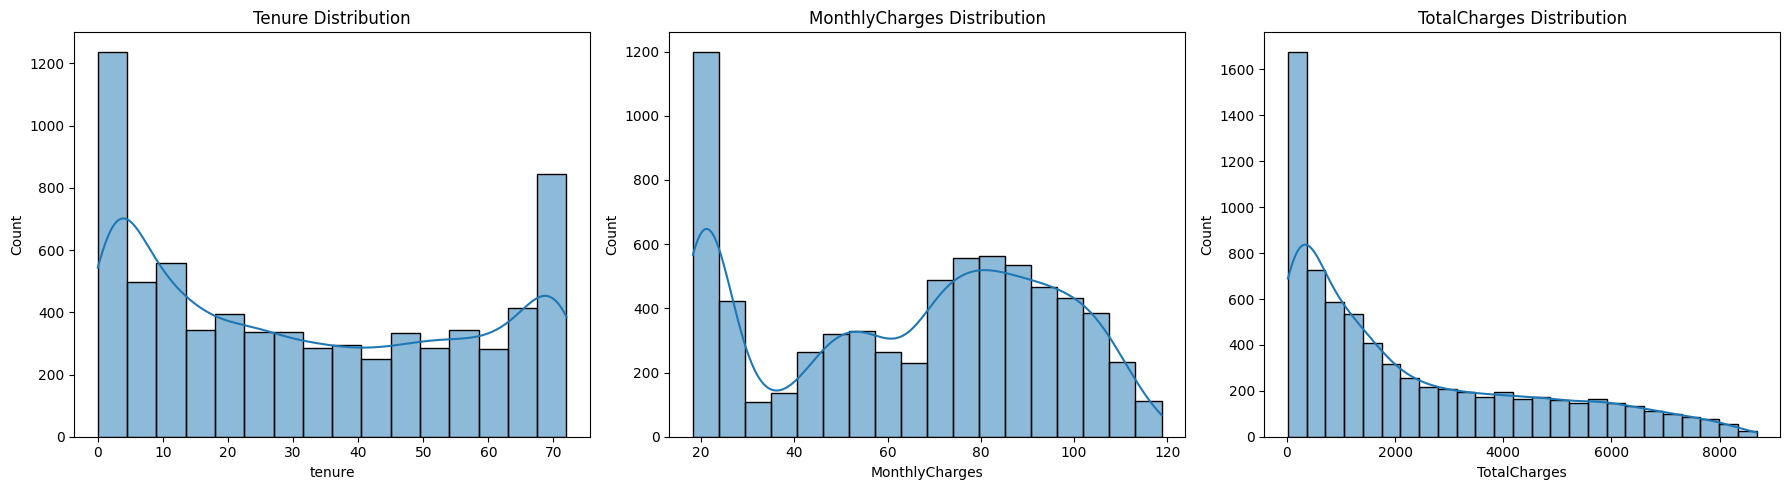

In [149]:
# Distribution of numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['tenure'], ax=axes[0], kde=True)
axes[0].set_title('Tenure Distribution')

sns.histplot(df['MonthlyCharges'], ax=axes[1], kde=True)
axes[1].set_title('MonthlyCharges Distribution')

sns.histplot(df['TotalCharges'], ax=axes[2], kde=True)
axes[2].set_title('TotalCharges Distribution')

plt.tight_layout()
plt.show()


e:\anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


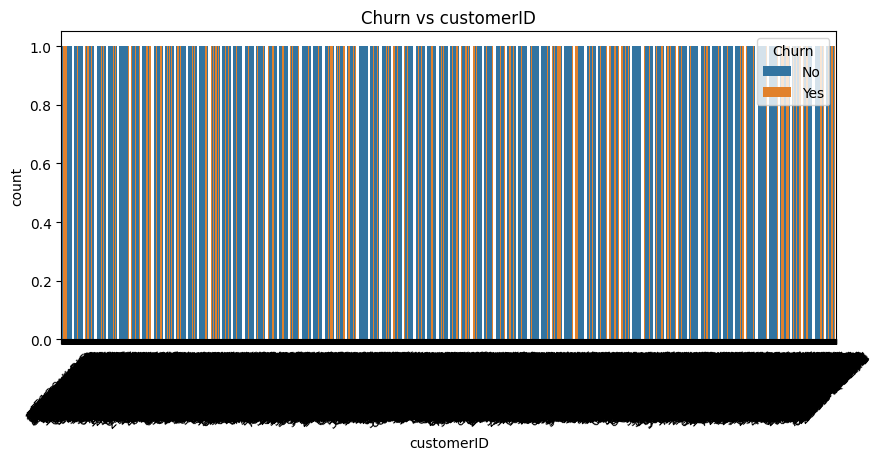

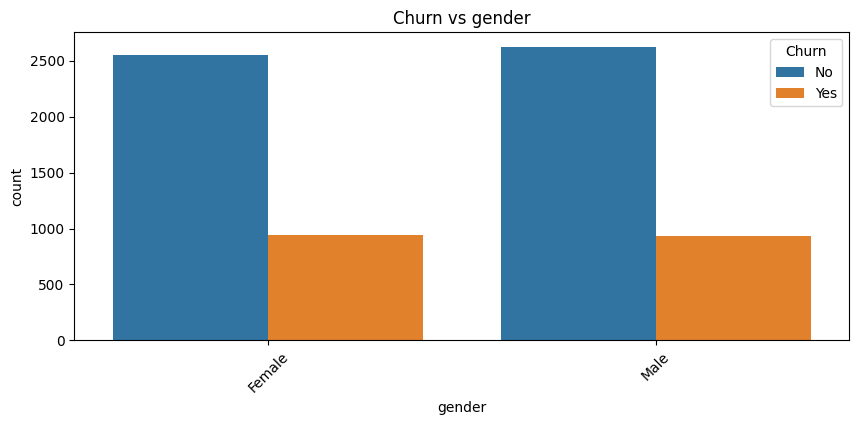

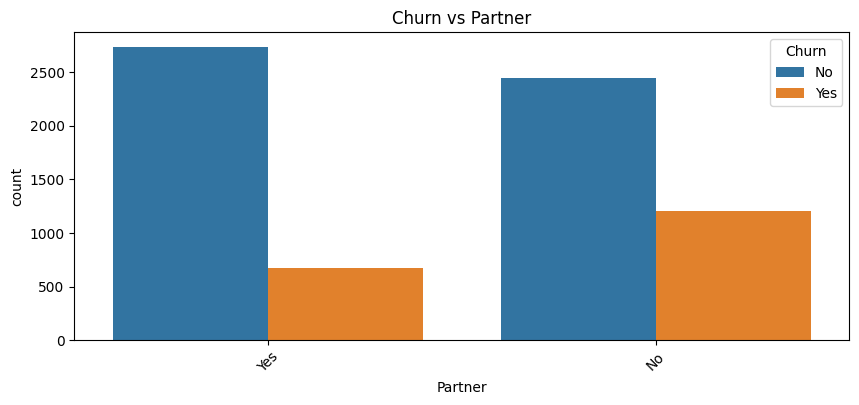

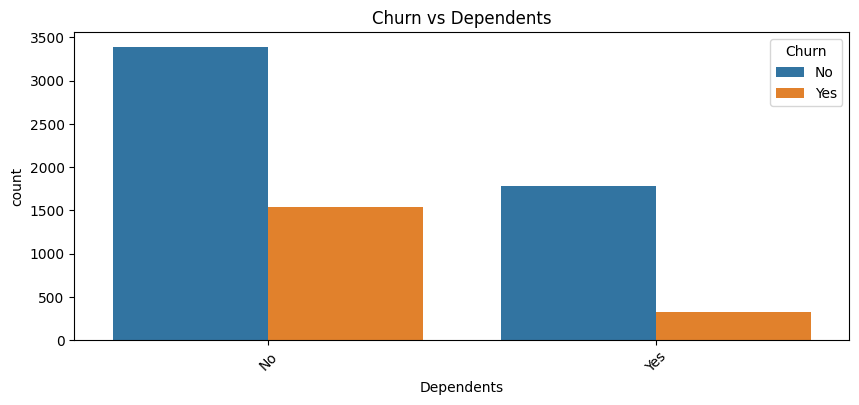

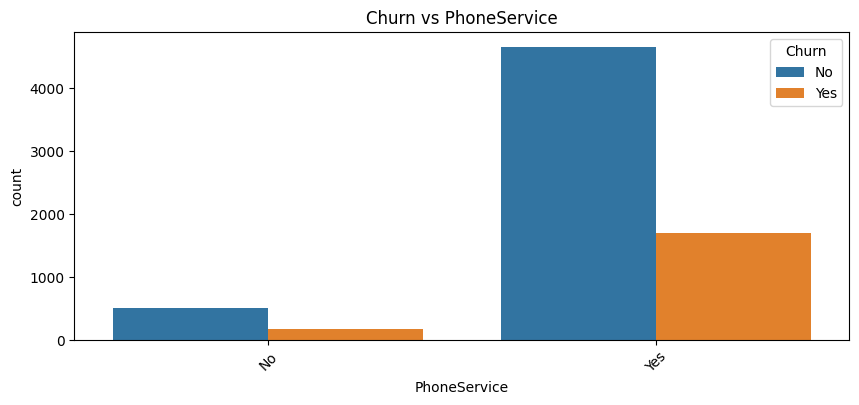

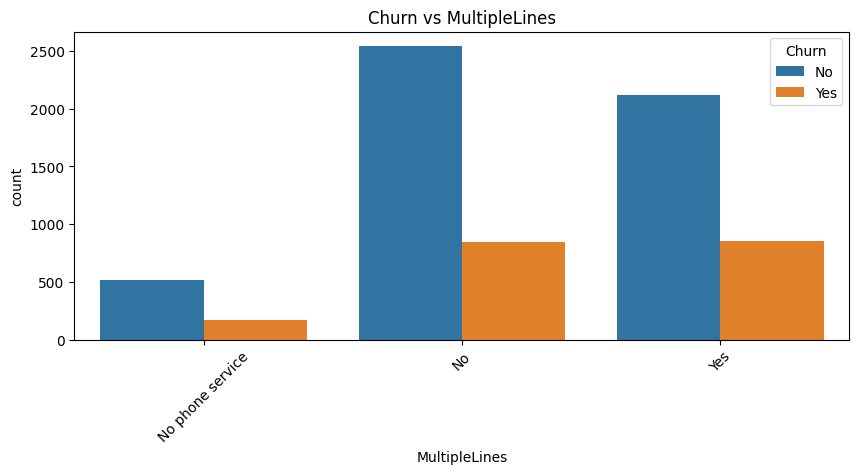

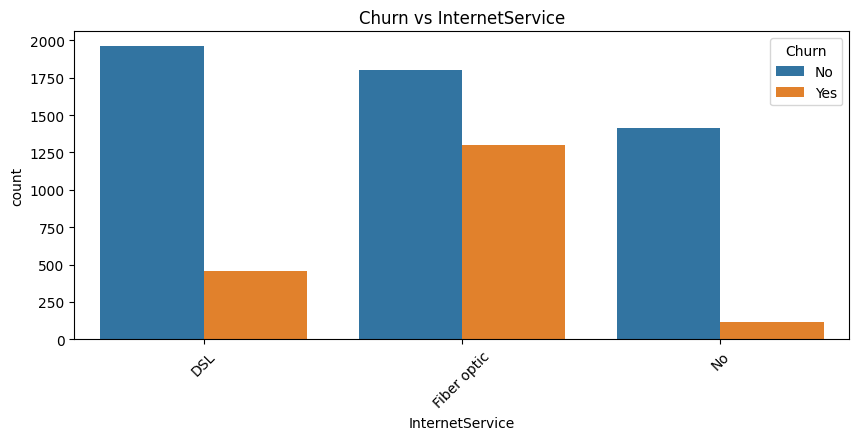

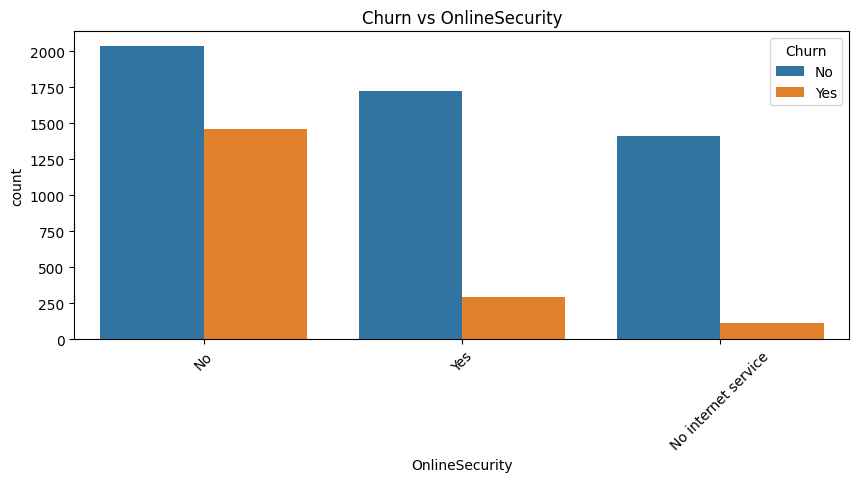

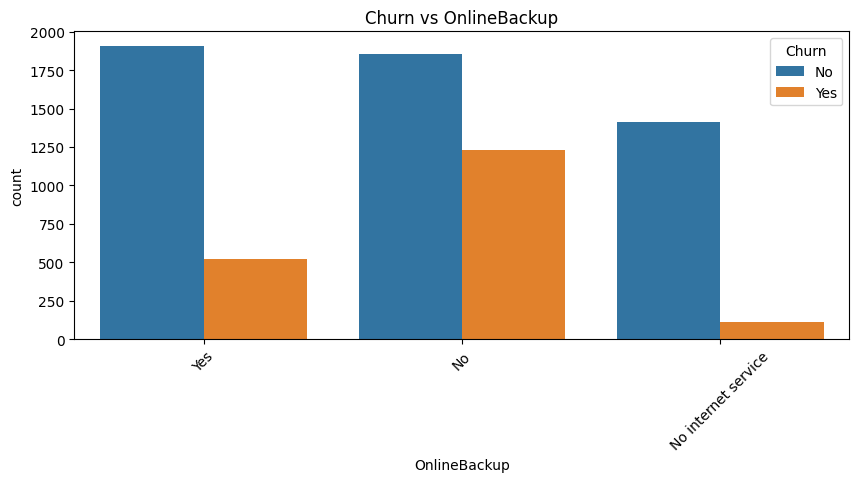

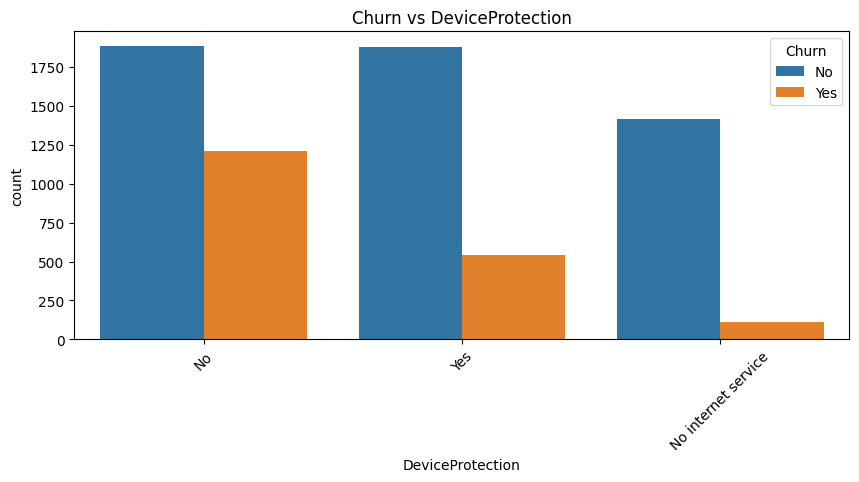

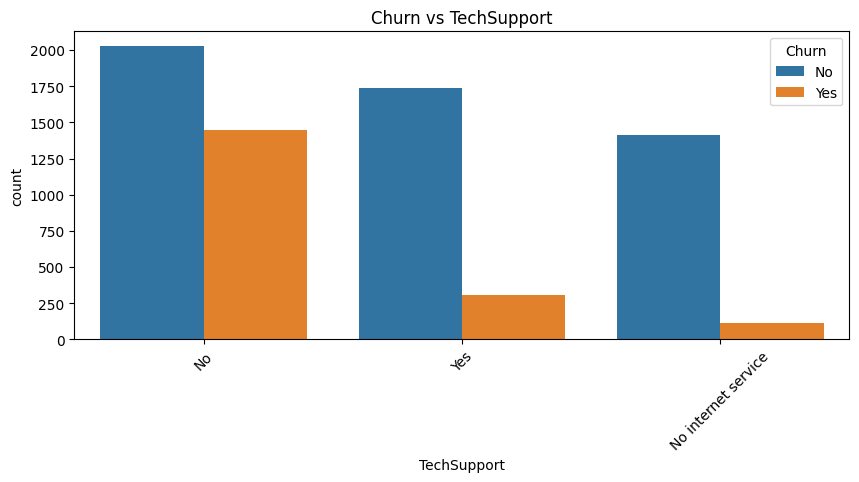

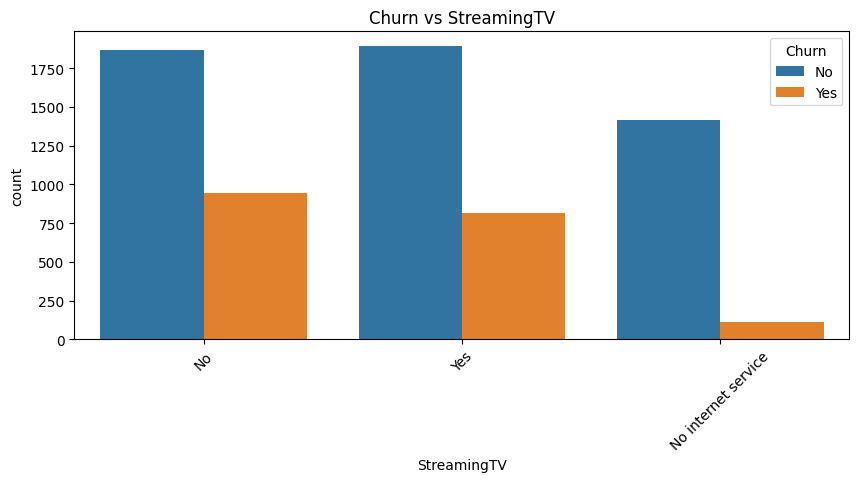

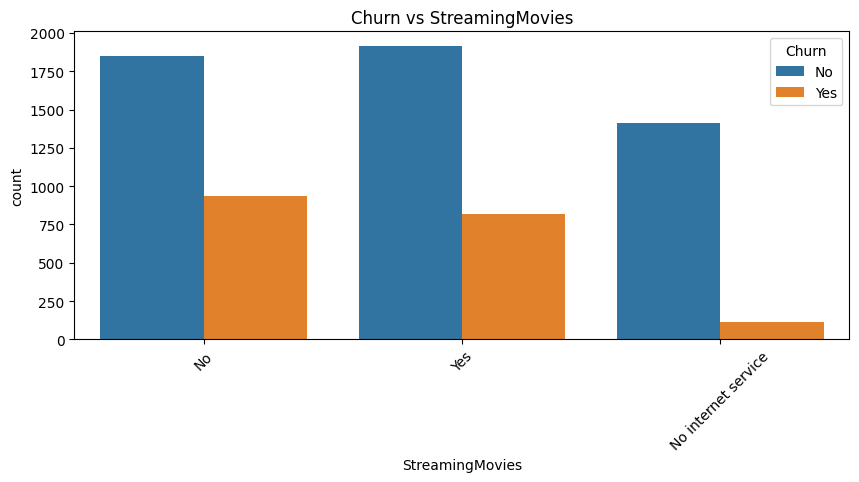

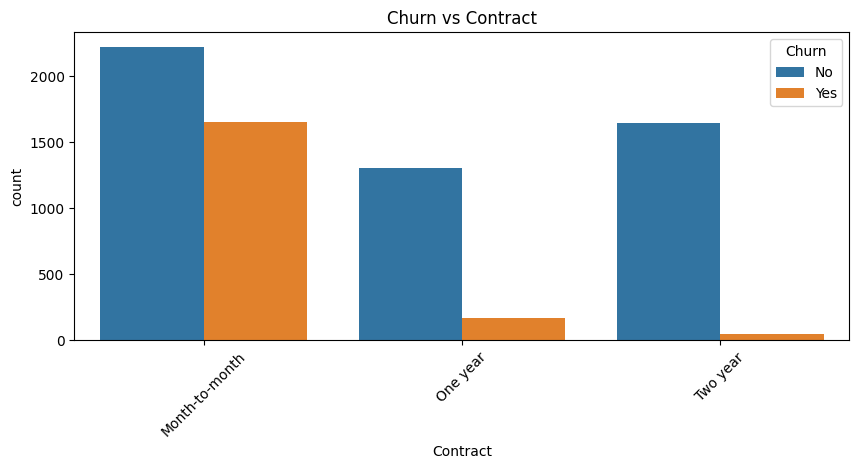

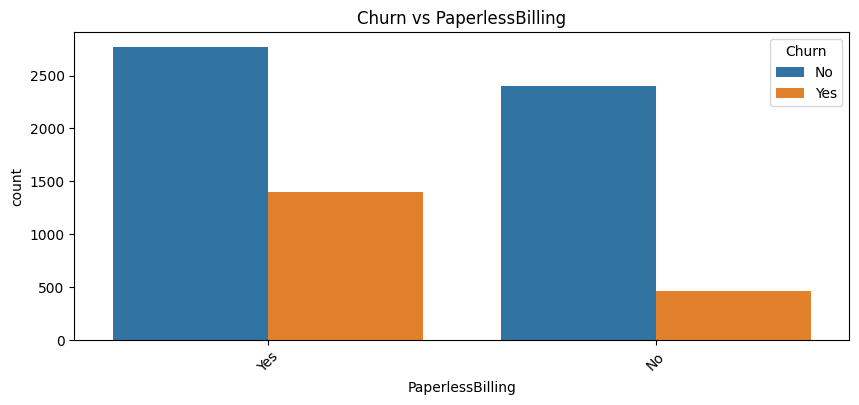

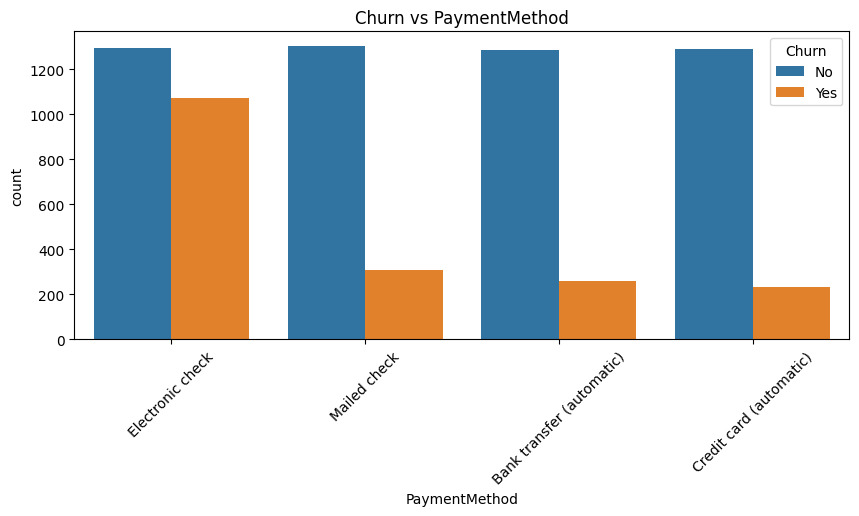

C:\Users\d\AppData\Local\Temp\ipykernel_24008\288608589.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Churn')


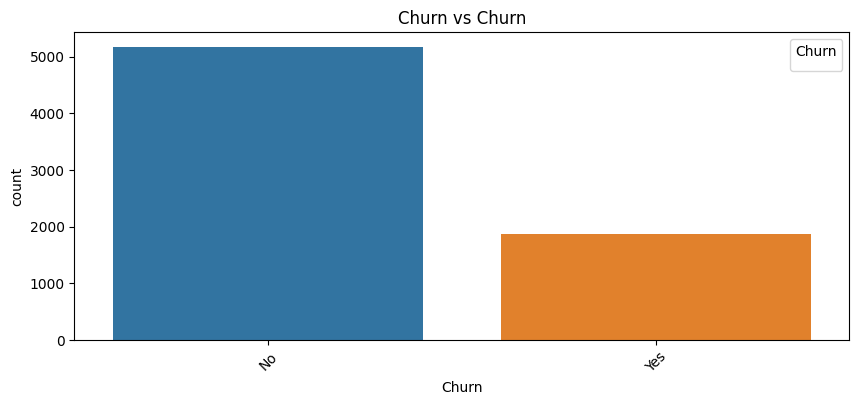

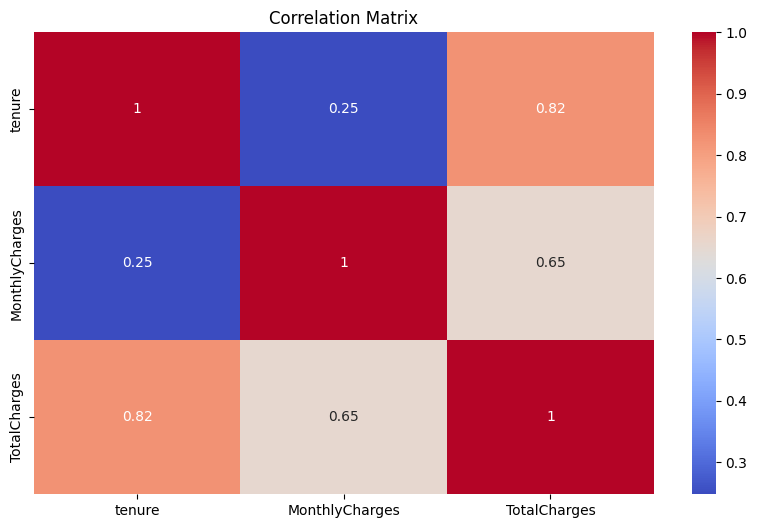

In [150]:

# Churn vs Categorical Features
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.xticks(rotation=45)
    plt.title(f'Churn vs {col}')
    plt.legend(title='Churn')
    plt.show()

# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

🏗️ 6. Feature Engineering

In [151]:
#  Feature Engineering
# Separate columns into numerical and categorical
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
ordinal_columns = ['Contract', 'PaymentMethod']
nominal_columns = [col for col in df.columns if col not in numerical_cols + ordinal_columns + ['customerID', 'Churn']]


In [152]:
print("\nNumerical Columns:")
print(numerical_cols)
print("\nOrdinal Columns:")
print(ordinal_columns)
print("\nNominal Columns:")
print(nominal_columns)


Numerical Columns:
['tenure', 'MonthlyCharges', 'TotalCharges']

Ordinal Columns:
['Contract', 'PaymentMethod']

Nominal Columns:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


In [153]:

# Encode ordinal and nominal columns
oe = OrdinalEncoder()
ohe = OneHotEncoder(drop='first')  # بدون sparse=False

df[ordinal_columns] = oe.fit_transform(df[ordinal_columns])
nominal_encoded = ohe.fit_transform(df[nominal_columns])

# تحويل الـ Sparse Matrix إلى Dense Array
nominal_encoded = nominal_encoded.toarray()

# تحويل البيانات المشفرة إلى DataFrame
nominal_encoded_df = pd.DataFrame(nominal_encoded, columns=ohe.get_feature_names_out(nominal_columns))

# Combine all features
df = pd.concat([df[numerical_cols], df[ordinal_columns], nominal_encoded_df, df['Churn']], axis=1)
#columns  after encoding
print(df.columns)
print(df.head())


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod',
       'gender_Male', 'SeniorCitizen_1', 'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'Churn'],
      dtype='object')
   tenure  MonthlyCharges  TotalCharges  Contract  PaymentMethod  gender_Male  \
0       1           29.85         29.85       0.0            2.0          0.0   
1      34           56.95       1889.50       1.0            3.0          1.0   
2     

🎯 7. Define X and y

In [154]:

X = df.drop(['Churn'], axis=1)
y = df['Churn']

⚖️ 8. Handle Class Imbalance Using Oversampling

In [155]:
# Handle Imbalanced Data using RandomOverSampler
ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)


e:\anaconda\Lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
e:\anaconda\Lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


🧪 9. Train-Test Split

In [156]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

🤖 10. Model Selection & Hyperparameter Tuning

In [157]:
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

param_grids = {
    "RandomForest": {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    "GradientBoosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5]
    },
    "LogisticRegression": {
        'C': [0.1, 1, 10]
    }
}
best_models = {}
for model_name, model in models.items():
    print(f"Training {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best Parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best Accuracy for {model_name}: {grid_search.best_score_}\n")


Training RandomForest...


Best Parameters for RandomForest: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy for RandomForest: 0.876782842214341

Training GradientBoosting...
Best Parameters for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Best Accuracy for GradientBoosting: 0.8299117737203906

Training LogisticRegression...
Best Parameters for LogisticRegression: {'C': 10}
Best Accuracy for LogisticRegression: 0.7605708072449173



e:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


📈 11. Evaluate Models


Evaluation for RandomForest:
              precision    recall  f1-score   support

          No       0.95      0.84      0.89      1021
         Yes       0.86      0.95      0.90      1049

    accuracy                           0.90      2070
   macro avg       0.90      0.90      0.90      2070
weighted avg       0.90      0.90      0.90      2070



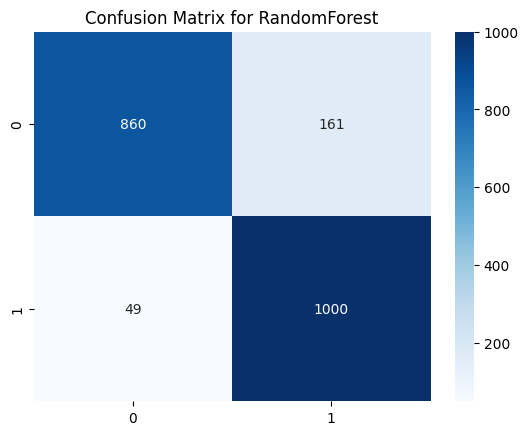


Evaluation for GradientBoosting:
              precision    recall  f1-score   support

          No       0.88      0.78      0.83      1021
         Yes       0.81      0.90      0.85      1049

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070



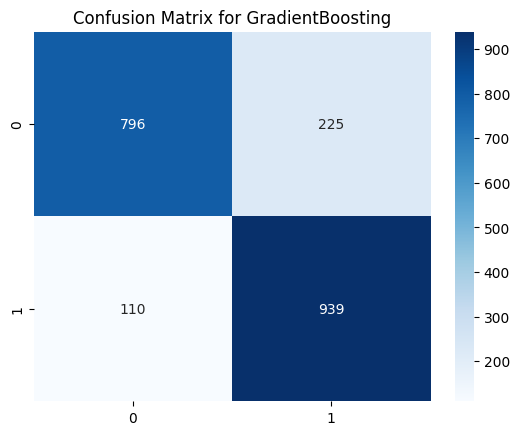


Evaluation for LogisticRegression:
              precision    recall  f1-score   support

          No       0.80      0.74      0.77      1021
         Yes       0.76      0.82      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.78      0.78      0.78      2070
weighted avg       0.78      0.78      0.78      2070



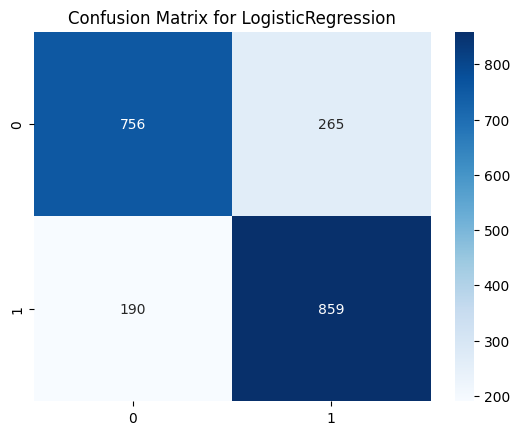

In [158]:


results = {}
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    results[model_name] = {"Accuracy": accuracy, "ROC AUC": roc_auc}
    print(f"\nEvaluation for {model_name}:")
    print(classification_report(y_test, y_pred))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


🏆 12. Compare Model Performance

In [159]:

# Compare Results
results_df = pd.DataFrame(results).T
print("Model Comparison:")
print(results_df)

# Select Best Model
best_model_name = results_df['Accuracy'].idxmax()
best_model = best_models[best_model_name]
print(f"\nBest Model: {best_model_name} with Accuracy: {results_df.loc[best_model_name, 'Accuracy']}")

Model Comparison:
                    Accuracy   ROC AUC
RandomForest        0.898551  0.968981
GradientBoosting    0.838164  0.913185
LogisticRegression  0.780193  0.860585

Best Model: RandomForest with Accuracy: 0.8985507246376812


💾 13. Save Best Model (Optional)

In [160]:
#save the best model
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']